In [129]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Importing Data

In [131]:
df = pd.read_csv("C:\\Users\\suhas\\Documents\\College Projects\\Leaf-Classification-Medicinal\\features.csv")

In [132]:
del df['Unnamed: 0']
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,anhui barberry,234.469870,53.357817,230.050427,64.794238,242.292892,33.301246,247343.5,2581.716941,315.243317,1118.116455,0.281941,0.466330,1.425058,1.801165,10.269227,0.997198,1.913799,0.897709
1,anhui barberry,239.078922,54.041678,237.209074,59.977314,244.533445,35.623070,150157.5,2290.212327,1046.269165,215.477997,4.855573,0.359754,1.501410,1.815112,5.256504,0.998636,1.334322,0.934745
2,anhui barberry,218.290143,69.075408,214.253183,76.172502,221.822949,63.520733,416083.0,3027.253080,1318.957520,438.283661,3.009370,0.570548,1.389332,1.722731,5.071890,0.999424,3.169692,0.838952
3,anhui barberry,217.351257,67.043355,212.549161,74.406684,223.302094,57.402874,447874.0,3194.875445,483.000000,1385.000000,0.348736,0.551389,1.493623,1.710319,4.559479,0.999406,4.024736,0.798812
4,anhui barberry,218.144054,74.602190,211.533462,87.120435,232.043578,46.657105,370707.0,2981.713976,1299.985229,417.071838,3.116934,0.523973,1.462576,1.736526,5.480717,0.999228,2.863736,0.849442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,yew plum pie,234.242239,59.867682,233.146252,62.838043,239.387608,45.404740,200744.5,3622.616771,1659.696533,189.951294,8.737485,0.192224,1.570461,1.958544,13.831646,0.997414,1.959992,0.903182
3868,yew plum pie,238.842217,53.379723,238.281136,55.069947,243.006186,39.912744,157450.0,2872.634016,1333.122192,167.578979,7.955187,0.239768,1.418884,1.914195,9.128245,0.997812,1.500554,0.927156
3869,yew plum pie,239.346296,52.635050,238.858972,54.053523,243.508021,38.926842,152291.0,2967.340517,1336.829590,163.496201,8.176518,0.217345,1.435190,1.977797,9.435902,0.997643,1.471075,0.929787
3870,yew plum pie,238.184639,55.654106,237.471164,57.896858,242.454985,41.833093,156123.0,3173.535598,1484.108521,143.116180,10.369956,0.194800,1.360465,1.950275,9.475949,0.997927,1.532577,0.927440


### Pre-processing

In [133]:
le = LabelEncoder()

In [134]:
col = []

for c in df.columns:
    col.append(c)
    
y = df[col[0]]
X = df[col[1:]]

In [135]:
scaler = StandardScaler()

In [136]:
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,anhui barberry,234.469870,53.357817,230.050427,64.794238,242.292892,33.301246,247343.5,2581.716941,315.243317,1118.116455,0.281941,0.466330,1.425058,1.801165,10.269227,0.997198,1.913799,0.897709
1,anhui barberry,239.078922,54.041678,237.209074,59.977314,244.533445,35.623070,150157.5,2290.212327,1046.269165,215.477997,4.855573,0.359754,1.501410,1.815112,5.256504,0.998636,1.334322,0.934745
2,anhui barberry,218.290143,69.075408,214.253183,76.172502,221.822949,63.520733,416083.0,3027.253080,1318.957520,438.283661,3.009370,0.570548,1.389332,1.722731,5.071890,0.999424,3.169692,0.838952
3,anhui barberry,217.351257,67.043355,212.549161,74.406684,223.302094,57.402874,447874.0,3194.875445,483.000000,1385.000000,0.348736,0.551389,1.493623,1.710319,4.559479,0.999406,4.024736,0.798812
4,anhui barberry,218.144054,74.602190,211.533462,87.120435,232.043578,46.657105,370707.0,2981.713976,1299.985229,417.071838,3.116934,0.523973,1.462576,1.736526,5.480717,0.999228,2.863736,0.849442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,yew plum pie,234.242239,59.867682,233.146252,62.838043,239.387608,45.404740,200744.5,3622.616771,1659.696533,189.951294,8.737485,0.192224,1.570461,1.958544,13.831646,0.997414,1.959992,0.903182
3868,yew plum pie,238.842217,53.379723,238.281136,55.069947,243.006186,39.912744,157450.0,2872.634016,1333.122192,167.578979,7.955187,0.239768,1.418884,1.914195,9.128245,0.997812,1.500554,0.927156
3869,yew plum pie,239.346296,52.635050,238.858972,54.053523,243.508021,38.926842,152291.0,2967.340517,1336.829590,163.496201,8.176518,0.217345,1.435190,1.977797,9.435902,0.997643,1.471075,0.929787
3870,yew plum pie,238.184639,55.654106,237.471164,57.896858,242.454985,41.833093,156123.0,3173.535598,1484.108521,143.116180,10.369956,0.194800,1.360465,1.950275,9.475949,0.997927,1.532577,0.927440


In [137]:
le.fit(y)
species = le.classes_

In [138]:
df['common name'] = le.transform(y)
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,0,234.469870,53.357817,230.050427,64.794238,242.292892,33.301246,247343.5,2581.716941,315.243317,1118.116455,0.281941,0.466330,1.425058,1.801165,10.269227,0.997198,1.913799,0.897709
1,0,239.078922,54.041678,237.209074,59.977314,244.533445,35.623070,150157.5,2290.212327,1046.269165,215.477997,4.855573,0.359754,1.501410,1.815112,5.256504,0.998636,1.334322,0.934745
2,0,218.290143,69.075408,214.253183,76.172502,221.822949,63.520733,416083.0,3027.253080,1318.957520,438.283661,3.009370,0.570548,1.389332,1.722731,5.071890,0.999424,3.169692,0.838952
3,0,217.351257,67.043355,212.549161,74.406684,223.302094,57.402874,447874.0,3194.875445,483.000000,1385.000000,0.348736,0.551389,1.493623,1.710319,4.559479,0.999406,4.024736,0.798812
4,0,218.144054,74.602190,211.533462,87.120435,232.043578,46.657105,370707.0,2981.713976,1299.985229,417.071838,3.116934,0.523973,1.462576,1.736526,5.480717,0.999228,2.863736,0.849442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,31,234.242239,59.867682,233.146252,62.838043,239.387608,45.404740,200744.5,3622.616771,1659.696533,189.951294,8.737485,0.192224,1.570461,1.958544,13.831646,0.997414,1.959992,0.903182
3868,31,238.842217,53.379723,238.281136,55.069947,243.006186,39.912744,157450.0,2872.634016,1333.122192,167.578979,7.955187,0.239768,1.418884,1.914195,9.128245,0.997812,1.500554,0.927156
3869,31,239.346296,52.635050,238.858972,54.053523,243.508021,38.926842,152291.0,2967.340517,1336.829590,163.496201,8.176518,0.217345,1.435190,1.977797,9.435902,0.997643,1.471075,0.929787
3870,31,238.184639,55.654106,237.471164,57.896858,242.454985,41.833093,156123.0,3173.535598,1484.108521,143.116180,10.369956,0.194800,1.360465,1.950275,9.475949,0.997927,1.532577,0.927440


In [139]:
df
a = set()
for i in range(len(df)):
    a.add(df.iloc[i]['common name'])
    
len(a)

32

### Splitting into Train and Test

In [140]:
col = []

for c in df.columns:
    col.append(c)

y_fin = df[col[0]]
X_fin= df[col[1:]]
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin, stratify=y_fin, random_state = 1)

In [141]:
X_train

,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
3356,195.291435,80.331304,182.507276,97.168254,217.655772,50.834073,699609.0,4305.202557,643.755432,1810.623657,0.355543,0.474327,1.666072,1.754090,61.544265,0.992682,5.653790,0.667891
544,189.887002,83.955698,180.314651,96.616611,208.067158,59.395912,663796.0,3595.624787,963.855225,1009.195801,0.955073,0.645202,1.465388,1.822368,6.966836,0.999307,4.326222,0.782015
3470,195.666318,86.256148,188.529278,96.054865,219.121167,52.904629,626299.0,3631.267361,930.492737,979.442749,0.950023,0.596864,1.455159,1.901251,17.645952,0.998073,4.839819,0.735895
1761,153.679684,96.240734,121.928316,123.048800,227.514812,28.715221,1034196.0,4651.565912,1589.123291,1068.330566,1.487483,0.600640,1.641574,1.750384,16.517873,0.997609,6.980783,0.589030
1888,166.875173,84.401530,161.753599,89.693056,199.350425,53.786478,991597.0,4352.698819,754.285706,1718.122314,0.439017,0.657700,1.306937,1.760510,4.244331,0.999527,5.294203,0.759344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,215.874459,64.850181,204.277886,82.707066,247.868823,14.061742,527593.5,3656.157627,1407.062622,580.513367,2.423825,0.495975,1.548197,1.839506,11.154369,0.995743,3.744623,0.784363
1039,174.906497,86.753629,167.371009,94.418690,207.870751,51.589263,889314.5,3771.916198,1118.761963,1022.309143,1.094348,0.785491,1.286070,1.761696,41.430228,0.995367,6.181729,0.606462
3083,164.564785,104.564269,154.168588,112.353552,198.953209,67.151682,882920.0,4147.697943,1726.244385,711.516785,2.426147,0.644937,1.391125,1.701437,95.140080,0.993103,7.073683,0.613587
208,189.183892,86.677462,177.180991,101.076995,217.011257,50.227935,718969.5,4183.146646,1237.806030,931.639343,1.328632,0.516314,1.603947,1.928210,14.940781,0.998327,5.397437,0.706438


In [142]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [143]:
X_train

array([[ 0.0481283 , -0.04612256, -0.07413767, ..., -2.05398701,
         0.56110418, -0.63127907],
       [-0.16822068,  0.1824933 , -0.15028951, ...,  1.17967757,
        -0.22924146,  0.46711347],
       [ 0.06313552,  0.32759873,  0.13501184, ...,  0.57720036,
         0.07651981,  0.02322831],
       ...,
       [-1.18191371,  1.48241977, -1.05836565, ..., -1.84891108,
         1.40641409, -1.15392876],
       [-0.19636741,  0.35417396, -0.25912431, ...,  0.70133119,
         0.40848884, -0.26028024],
       [ 1.02510347, -0.96041694,  0.97103447, ..., -0.60225165,
        -0.79014806,  0.73121457]])

### Create SVM and Optimise

In [169]:
clf = SVC()

In [170]:
params = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.05, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0.01, 0.1, 1, 5, 10, 100], 'degree': [1, 2, 3, 4, 5, 6]}

In [171]:
clf.fit(X_train, y_train)

SVC()

In [172]:
clf.score(X_test, y_test)

0.8140495867768595

In [173]:
gsc = GridSearchCV(clf, param_grid=params, n_jobs=-1)

In [174]:
grid_result = gsc.fit(X_train, y_train)

In [175]:
best_params = grid_result.best_params_
best_params

{'C': 5, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}

In [176]:
grid_result.best_score_

0.9163220369161375

In [177]:
clf = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability = True, degree=best_params['degree'])
clf

SVC(C=5, degree=1, gamma=10, kernel='poly', probability=True)

In [265]:
#clf.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [27]:
#clf.score(X_test, y_test)

### Learning Curve

In [178]:
X_fin = scaler.fit_transform(X_fin)

In [179]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_fin, y_fin, shuffle=True)

In [180]:
train_scores_mean = train_scores.mean(axis = 1)
train_scores_mean

array([0.997411  , 0.99025845, 0.98719906, 0.98575   , 0.98385534])

In [181]:
test_scores_mean = test_scores.mean(axis = 1)
test_scores_mean

array([0.70193215, 0.81996699, 0.86774894, 0.89590298, 0.90959373])

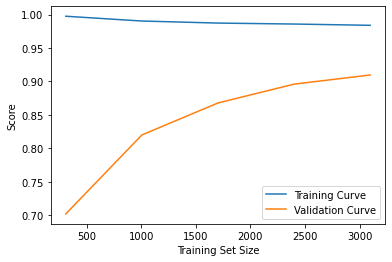

In [182]:
plt.plot(train_sizes, train_scores_mean, label='Training Curve')
plt.plot(train_sizes, test_scores_mean, label = 'Validation Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()

In [183]:
clf.fit(X_fin, y_fin)

SVC(C=5, degree=1, gamma=10, kernel='poly', probability=True)

In [184]:
clf.score(X_test, y_test)

0.987603305785124